#### Import Libs

In [1]:
import os
import re
import numpy as np
import simpy
import time
from numpy import random
from math import floor
import math
from matplotlib import pyplot as plt
from scipy.stats import expon
from scipy.stats import uniform
from scipy.stats import randint
from scipy.stats import poisson

<hr>

## Ejercicio 1

####  File Utils

In [2]:
def read_file(folder, filename):
    filepath = os.path.join(folder, filename)
    file = open(filepath, 'r')
    page = file.read()
    return page

In [3]:
link_regex = '<a href=\"http://(.*?).html'

#### Page Rank

In [4]:
def open_pages(folder):
    filenames = os.listdir(folder)
    page_names = list(map(lambda filename: filename.split('.')[0], filenames))
    pages = []
    for filename in filenames:        
        page = read_file(folder, filename)
        pages.append(page)
    return (pages, page_names)

def markov_row(page, page_names):
    # n pages
    n = len(page_names)
    
    # search links in the page
    matchs = re.findall(link_regex, page)
    
    # build adjacency
    row = []
    if len(matchs) == 0:
        row = [1/n, 1/n, 1/n, 1/n, 1/n, 1/n]
    else:
        for page_name in page_names:
            n_matchs = 0
            for match in matchs:
                if page_name == match:
                    n_matchs += 1
            row.append(n_matchs / len(matchs))
    
    return row

def markov_matrix(pages, page_names):
    matrix = np.zeros(shape=(len(page_names), len(page_names)))
    for index, page in enumerate(pages):
        row = markov_row(page, page_names)
        matrix[index] = row
    return matrix

def distribucion_estacionaria(A):
    A = [1,0,0,0,0,0]
    for i in range(1000):
        A = np.dot(A,matrix)
    return A

#### Run

In [5]:
import string
folder = 'paginas'
filenames = os.listdir(folder)

indexes=dict()
for filename in filenames: 
    
    filepath = os.path.join(folder, filename)

    text = open(filepath, 'r')

    # Create an empty dictionary
    d = dict()
    # Loop through each line of the file
    for line in text:
        # Remove the leading spaces and newline character
        line = line.strip()

        # Convert the characters in line to
        # lowercase to avoid case mismatch
        line = line.lower()

        # Remove the punctuation marks from the line
        line = line.translate(line.maketrans("", "", string.punctuation))

        # Split the line into words
        words = line.split(" ")

        # Iterate over each word in line
        for word in words:
            # Check if the word is already in dictionary
            if word in d:
                # Increment count of word by 1
                d[word] = d[word] + 1
            else:
                # Add the word to dictionary with count 1
                d[word] = 1

                
    indexes[filename.split('.')[0]] = d

In [6]:
folder = 'paginas'
pages, page_names = open_pages(folder)
matrix = markov_matrix(pages, page_names)

print("Markov Matrix\n")
print(matrix)
print("\n")

page_rank = distribucion_estacionaria(matrix)
print("Page Rank\n")
aux = dict()

for i in range(len(page_names)):
    aux[page_names[i]]=page_rank[i]
    print(page_names[i][:13],"\t",page_rank[i])
page_rank = aux

# Sort key
def value_getter(item):
     return item[1]

sorted(aux.items(), key=value_getter,reverse=True)

Markov Matrix

[[0.         0.5        0.         0.         0.         0.5       ]
 [0.5        0.         0.25       0.         0.25       0.        ]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.         0.         1.         0.         0.         0.        ]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.66666667 0.33333333 0.         0.         0.         0.        ]]


Page Rank

angelinajolie 	 0.28571428571428525
bradpitt 	 0.24489795918367308
martinscorces 	 0.14285714285714263
robertdeniro 	 0.04081632653061218
jenniferanist 	 0.10204081632653045
jonvoight 	 0.1836734693877548


[('angelinajolie', 0.28571428571428525),
 ('bradpitt', 0.24489795918367308),
 ('jonvoight', 0.1836734693877548),
 ('martinscorcese', 0.14285714285714263),
 ('jenniferaniston', 0.10204081632653045),
 ('robertdeniro', 0.04081632653061218)]

$\begin{bmatrix}    0 & 0 & 1 & 0 & 0 & 0\\    1/5 & 1/5 & 1/5 & 1/5 & 1/5 & 1/5 \\  1/5 & 1/5 & 1/5 & 1/5 & 1/5 & 1/5 \\   0 & 0 & 0 & 0 & 2/3 & 1/3 \\ 0 & 0 & 0 & 1/2 & 0 & 1/2 \\ 0 & 1/4 & 1/4 & 0 & 1/2 & 0 \\ \end{bmatrix}$

In [7]:
def calculate_scores(word):
    scores=dict()
    for key in list(indexes.keys()):
        if indexes[key].get(word) is None:
            # si no encuentra la palabra directamente le pone puntaje 0
            scores[key] = 0
        else:
            # ponderacion basica entre aparicion y page rank
            scores[key]=0.5* indexes[key].get(word) + 0.5*page_rank[key]
    return sorted(scores.items(), key=lambda item: item[1],reverse=True)

scores=calculate_scores("film")
print(scores)

scores=calculate_scores("action")
print(scores)

scores=calculate_scores("actor")
print(scores)

[('martinscorcese', 3.071428571428571), ('angelinajolie', 1.6428571428571426), ('bradpitt', 1.6224489795918364), ('jonvoight', 0.5918367346938774), ('jenniferaniston', 0.5510204081632653), ('robertdeniro', 0.5204081632653061)]
[('angelinajolie', 0), ('bradpitt', 0), ('martinscorcese', 0), ('robertdeniro', 0), ('jenniferaniston', 0), ('jonvoight', 0)]
[('jonvoight', 2.0918367346938775), ('robertdeniro', 1.5204081632653061), ('bradpitt', 1.1224489795918364), ('martinscorcese', 1.0714285714285714), ('angelinajolie', 0.6428571428571426), ('jenniferaniston', 0)]


<hr>

## Ejercicio 2

In [8]:
"""
Pure image capture Satellite with FOFS scheduling policy simulator.

Covers:

- Arrival pattern of image requests are Poisson distributed arrival date
- Rate service depends on number of queded reqeusts.

"""

import simpy


RANDOM_SEED = 42
REQ_ARRIVAL_MU = 10
PROC_BASE_MU = 0.8
N_REQUESTS = 100000

class Satellite(object):
    """
    The Satellite handles each request with an exponential wait that depends on the number of Queued items.
    """
    
    def __init__(self, env):
        self.env = env
        self.machine = simpy.Resource(env)
        self.elements_in_queue = []
        
    def process_req(self):
        q_size = len(self.machine.queue)
        self.elements_in_queue.append(q_size)

        req_procesing_time = random.exponential(1 / (PROC_BASE_MU * (q_size + 1) ))
        yield self.env.timeout(req_procesing_time)
    
    def get_queue_values(self):
        return self.elements_in_queue
    

def image_request(env, cw, processing_times):
    """Each image equest arrives at the satellite. And waits to be processed."""


    req_incom = env.now
    with cw.machine.request() as request:
        yield request


        yield env.process(cw.process_req())
        
        processing_times.append(env.now - req_incom)



def request_generator(env, satellite, processing_times):
    """ Request generator following a Poisson distribution with Lambda = REQ_ARRIVAL_MU"""

    
    i = 0

    # Create more cars while the simulation is running
    while i < N_REQUESTS:
        req_arrival_time = random.exponential(1 / REQ_ARRIVAL_MU)
        yield env.timeout(req_arrival_time)
        i += 1
        env.process(image_request(env, satellite, processing_times))



random.seed(RANDOM_SEED)

# Create an environment and start the setup process
env = simpy.Environment()
satellite = Satellite(env)

processing_times = []
env.process(request_generator(env, satellite, processing_times))

# Execute!
env.run()




Text(0, 0.5, 'Probability')

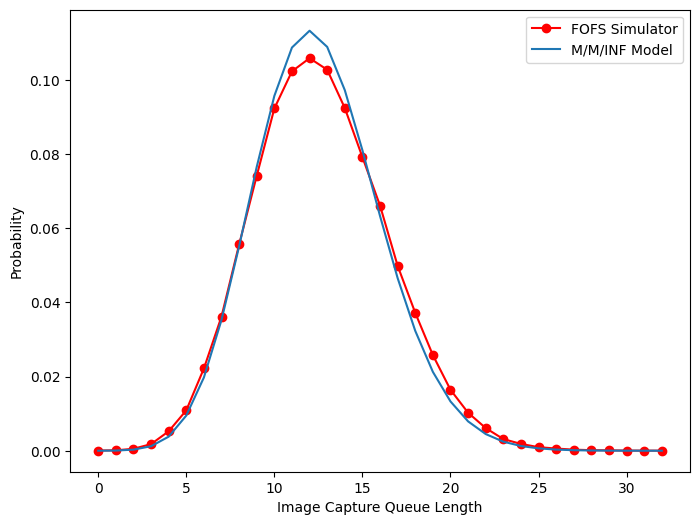

In [9]:
def rel_freq(x):
    vals = set(x)
    y = [x.count(value)/len(x) for value in set(x)] 
    x_vals = [value for value in set(x)]
    return y, x_vals

y, x = rel_freq(satellite.get_queue_values())
# creating a numpy array for x-axis
# using step size as 1
x_po = np.arange(0, len(x), 1)
 
# poisson distribution data for y-axis
y_po = poisson.pmf(x, mu=REQ_ARRIVAL_MU/PROC_BASE_MU)
 
 
# plotting the graph


plt.show()

fig, ax = plt.subplots(figsize=(8,6))
# ax.figure(figsize=(10,8))
ax.plot(x, y, 'r-o', label='FOFS Simulator')
ax.plot(x_po, y_po, label='M/M/INF Model')
ax.legend()

ax.set_xlabel('Image Capture Queue Length')
ax.set_ylabel('Probability')

### Tamaño promedio de la cola 

$$  Li = \frac{\lambda}{\mu} $$

In [10]:
val = REQ_ARRIVAL_MU/PROC_BASE_MU
print('Tamaño de la muestra %d' % N_REQUESTS)

print('Resultado esperado %f' % val)
print('Resultado obtenido %f' % np.average(satellite.get_queue_values()))

Tamaño de la muestra 100000
Resultado esperado 12.500000
Resultado obtenido 12.627720


### Tiempo promedio de espera

$$  W = \frac{Li}{\lambda} $$

In [11]:
val = REQ_ARRIVAL_MU/PROC_BASE_MU
print('Tamaño de la muestra %d' % N_REQUESTS)

print('Resultado esperado %f' % (1 / PROC_BASE_MU))
print('Resultado obtenido %f' % np.average(processing_times))

Tamaño de la muestra 100000
Resultado esperado 1.250000
Resultado obtenido 1.362053


<hr>

## Ejercicio 3

<b>Web Service</b>. El cual consulta una <b>Base de Datos</b>.

Dos opciones: <br>
a) Utilizar dos bases de datos => <b>M/M/2</b> (dos canales de atencion) <br>
b) Utilizar una base de datos => <b>M/M/1</b> (un canal de atencion) <br>

#### Web Service Simulacion

In [860]:
n = 100000

class Request:
    def __init__(self, timestamp):
        self.start = timestamp
        
    def set_servicio_comienzo(self, timestamp):
        self.servicio_comienzo = timestamp
    
    def set_servicio_termino(self, timestamp):
        self.servicio_termino = timestamp
        
    def get_elapsed_hasta_ser_atendido(self):
        return self.servicio_comienzo - self.start
        
    def get_elapsed_total(self):
        return self.servicio_termino - self.start
    
    def set_espero(self, espero):
        self.espero = espero
        
    def get_espero(self):
        return self.espero
    
def get_media_hasta_ser_atendido(requests):
    total = 0
    for request in requests:
        total += request.get_elapsed_hasta_ser_atendido()
    return total / n
        
def get_media(requests):
    total = 0
    for request in requests:
        total += request.get_elapsed_total()
    return total / n
    
def get_fraccion_no_espera(requests):
    total = 0
    for request in requests:
        if request.get_espero() is False:
            total += 1
    return total / n
    
class BaseDeDatos:
    def __init__(self, env, mu):
        self.mu = mu
        self.resource = simpy.Resource(env, 1)
        
class WebService1:
    ######################################
    # Server con una unica Base de Datos #
    ######################################
    
    def __init__(self, media_request, media_base_de_datos):
        self.env = simpy.Environment()
        self.base_de_datos = BaseDeDatos(self.env, media_base_de_datos)
        self.media_requests = media_request
        self.requests = []
        
    def process_request(self):
        request = Request(self.env.now) # set start
        request.set_espero(False if self.base_de_datos.resource.count == 0 else True)
    
        with self.base_de_datos.resource.request() as req:
            results = yield req # delay hasta que servicio se libera
            request.set_servicio_comienzo(self.env.now) # set comienzo de servicio
            yield self.env.timeout(random.exponential(self.base_de_datos.mu)) # delay tiempo de servicio
            request.set_servicio_termino(self.env.now) # set termino servicio
            self.requests.append(request)
    
    def start(self):
        for i in range(n):
            self.env.process(self.process_request()) # proceso request
            yield self.env.timeout(random.exponential(self.media_requests)) # delay tiempo de arribo

    def run(self):
        self.env.process(self.start())
        self.env.run()
        
class WebService2:
    #################################
    # Server con dos Bases de Datos #
    #################################
    
    p = 0.7

    def __init__(self, media_request, medias_base_de_datos):
        self.env = simpy.Environment()
        self.bases_de_datos = [BaseDeDatos(self.env, medias_base_de_datos[0]), BaseDeDatos(self.env, medias_base_de_datos[0])]
        self.media_requests = media_request
        self.requests = []
        
    def process_request(self, base_de_datos):
        request = Request(self.env.now)
        request.set_espero(False if base_de_datos.resource.count == 0 else True)

        with base_de_datos.resource.request() as req:
            results = yield req # delay hasta que atencion se libera
            request.set_servicio_comienzo(self.env.now) # set comienzo de servicio
            yield self.env.timeout(random.exponential(base_de_datos.mu)) # delay tiempo de servicio
            request.set_servicio_termino(self.env.now) # set termino servicio
            self.requests.append(request)
        
    def start(self):
        for i in range(n):
            # bifurcacion a que base de datos voy
            x = random.uniform(low=0.0, high=1.0, size=None)
            i = 0 if x < self.p else 1
            self.env.process(self.process_request(self.bases_de_datos[i])) # proceso request
            yield self.env.timeout(random.exponential(self.media_requests)) # delay tiempo de arribo
        
    def run(self):
        self.env.process(self.start())
        self.env.run()

#### Media Teorica

In [13]:
def media_teorica(lambda_, mu):
    return 1/(mu - lambda_)

### Run

#### Un Canal (b)

In [861]:
# tasa arribos:    4 / segundo
# tasa servicio: 0.8 / segundo
media_requests = 4
media_base_de_datos = 0.8
lambda_ = 1/media_requests
mu_ = 1/media_base_de_datos

web_service = WebService1(media_requests, media_base_de_datos)
web_service.run()

print("simulacion | media tiempo hasta ser atendido: {}".format(get_media_hasta_ser_atendido(web_service.requests)))
print("simulacion | media tiempo en el sistema: {}".format(get_media(web_service.requests)))
print("teorica    | media tiempo en el sistema: {}".format(media_teorica(1/media_requests, 1/media_base_de_datos)))
print("simulacion | fraccion que no esperaron: {}".format(get_fraccion_no_espera(web_service.requests)))

simulacion | media tiempo hasta ser atendido: 0.19221605337213366
simulacion | media tiempo en el sistema: 0.9876010617450658
teorica    | media tiempo en el sistema: 1.0
simulacion | fraccion que no esperaron: 0.80312


#### Dos Canales (a)

In [862]:
# tasa arribos:    4   / segundo
# tasa servicio 1: 0.7 / segundo
# tasa servicio 2: 1   / segundo

p = 0.7

lambda_ = 1/4
mu_1_ = 1/0.7
mu_2_ = 1/1

media_requests = 1/lambda_
media_base_de_datos_1 = 1/mu_1_
media_base_de_datos_2 = 1/mu_2_

web_service = WebService2(media_requests, [media_base_de_datos_1, media_base_de_datos_2])
web_service.run()

print("simulacion | media tiempo hasta ser atendido: {}".format(get_media_hasta_ser_atendido(web_service.requests)))
print("simulacion | media tiempo en el sistema: {}".format(get_media(web_service.requests)))
print("simulacion | fraccion que no esperaron: {}".format(get_fraccion_no_espera(web_service.requests)))

simulacion | media tiempo hasta ser atendido: 0.08066191036306153
simulacion | media tiempo en el sistema: 0.7797219623500781
simulacion | fraccion que no esperaron: 0.89864


<hr>

#### Distintos escenarios

#### Factor de trafico: 1/2

In [16]:
# tasa arribos:  2 / segundo
# tasa servicio: 1 / segundo
# factor de trafico: (1/2)/1 = 1/2
media_requests = 2
media_base_de_datos = 1
lambda_ = 1/media_requests
mu_ = 1/media_base_de_datos

web_service = WebService1(media_requests, media_base_de_datos)
web_service.run()

print("simulacion | media tiempo hasta ser atendido: {}".format(get_media_hasta_ser_atendido(web_service.requests)))
print("simulacion | media tiempo en el sistema: {}".format(get_media(web_service.requests)))
print("teorica    | media tiempo en el sistema: {}".format(media_teorica(lambda_, mu_)))
print("simulacion | fraccion que no esperaron: {}".format(get_fraccion_no_espera(web_service.requests)))

simulacion | media tiempo hasta ser atendido: 0.990205454728911
simulacion | media tiempo en el sistema: 1.9934406460092426
teorica    | media tiempo en el sistema: 2.0
simulacion | fraccion que no esperaron: 0.50041


#### Factor de trafico: 1/5

In [864]:
# tasa arribos:  5 / segundo
# tasa servicio: 1 / segundo
# factor de trafico: (1/5)/1 = 1/5
media_requests = 5
media_base_de_datos = 1
lambda_ = 1/media_requests
mu_ = 1/media_base_de_datos

web_service = WebService1(media_requests, media_base_de_datos)
web_service.run()

print("simulacion | media tiempo hasta ser atendido: {}".format(get_media_hasta_ser_atendido(web_service.requests)))
print("simulacion | media tiempo en el sistema: {}".format(get_media(web_service.requests)))
print("teorica    | media tiempo en el sistema: {}".format(media_teorica(lambda_, mu_)))
print("simulacion | fraccion que no esperaron: {}".format(get_fraccion_no_espera(web_service.requests)))

simulacion | media tiempo hasta ser atendido: 0.2515748435957305
simulacion | media tiempo en el sistema: 1.25656357149895
teorica    | media tiempo en el sistema: 1.25
simulacion | fraccion que no esperaron: 0.79924


#### Factor de trafico: 1/30

In [863]:
# tasa arribos:  30 / segundo
# tasa servicio: 1 / segundo
# factor de trafico: (1/30)/1 = 1/30
media_requests = 30
media_base_de_datos = 1
lambda_ = 1/media_requests
mu_ = 1/media_base_de_datos

web_service = WebService1(media_requests, media_base_de_datos)
web_service.run()

print("simulacion | media tiempo hasta ser atendido: {}".format(get_media_hasta_ser_atendido(web_service.requests)))
print("simulacion | media tiempo en el sistema: {}".format(get_media(web_service.requests)))
print("teorica    | media tiempo en el sistema: {}".format(media_teorica(lambda_, mu_)))
print("simulacion | fraccion que no esperaron: {}".format(get_fraccion_no_espera(web_service.requests)))

simulacion | media tiempo hasta ser atendido: 0.03528542858228914
simulacion | media tiempo en el sistema: 1.031236853162048
teorica    | media tiempo en el sistema: 1.0344827586206897
simulacion | fraccion que no esperaron: 0.96652


Concluimos que a menor factor de trafico mejores dan los tiempos.

## Ejercicio 4

In [19]:
CAP_MAX = 2000 # capacidad máxima de billetes

MEDIA_ARRIVO = 10 # media de la dist exp de tpo entre arrivo (10min)
LAMBDA_ARRIVO = 1 / MEDIA_ARRIVO

PROB_RET = 0.75 # probabilidad de que el cliente retire
MEDIA_RET = 1.5 # media de la dist exp de tpo de retiro (90s = 1.5min)
LAMBDA_RET = 1 / MEDIA_RET
MIN_RET = 3 # cant min de billetes que retira
MAX_RET = 50 # cant max de billetes que retira

MEDIA_DEP = 5 # media de la dist exp de tpo de deposito (5min)
LAMBDA_DEP = 1 / MEDIA_DEP
MIN_DEP = 10 # cant min de billetes que deposita
MAX_DEP = 110 # cant max de billetes que deposita

DIAS_SIM = 1000
MINUTOS_DIA = 24 * 60
TPO_SIM = DIAS_SIM * MINUTOS_DIA # tiempo de simulación (1000 dias)

In [20]:
# Definimos la simulación
#
# Referencias y materiales:
# - https://simpy.readthedocs.io/en/latest/simpy_intro/index.html
# - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
# - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform
# - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html
# - https://towardsdatascience.com/introduction-to-simulation-with-simpy-322606d4ba0c
# - https://simpy.readthedocs.io/en/latest/topical_guides/resources.html#containers

def operar(env, atm, nro_cl, media_op, cantidad, condicion, operacion):
    global caja, tot_abandonos, txs
    with atm.request() as req:
        tpo_entra_queue = env.now
        yield req;
        tpo_sale_queue = env.now
        tpo_espera = tpo_sale_queue - tpo_entra_queue

        tpo_op = expon.rvs(scale=media_op, size=1)[0]

        if condicion(caja, cantidad):
            caja = operacion(caja, cantidad)
            yield env.timeout(tpo_op)

            txs = np.vstack((txs, [caja, env.now, floor(env.now // MINUTOS_DIA)]))
        else:
            # no se da la condición para poder operar, abandona
            tot_abandonos += 1

        tpos_en_sist.append(tpo_espera + tpo_op)

def ret(env, atm, nro_cl):
    cantidad = randint.rvs(MIN_RET, MAX_RET, size=1)[0]
    condicion = lambda caja, cant: caja - cant >= 0
    operacion = lambda caja, cant: caja - cant
    return operar(env, atm, nro_cl, MEDIA_RET, cantidad, condicion, operacion)
    
def dep(env, atm, nro_cl):
    cantidad = randint.rvs(MIN_DEP, MAX_DEP, size=1)[0]
    condicion = lambda caja, cant: caja + cant < CAP_MAX
    operacion = lambda caja, cant: caja + cant
    return operar(env, atm, nro_cl, MEDIA_DEP, cantidad, condicion, operacion)

def arrivos_clientes(env, atm):
    global caja, tot_arrivos
    caja = CAP_MAX

    nro_cl = 0
    while True:
        # generamos un tpo de arrivo exponencial
        tpo_arrivo = expon.rvs(scale=MEDIA_ARRIVO, size=1)[0]
        yield env.timeout(tpo_arrivo)
        nro_cl += 1

        retira_dinero = uniform.rvs() < PROB_RET

        if retira_dinero:
            env.process(ret(env, atm, nro_cl))
        else:
            env.process(dep(env, atm, nro_cl))
    
        tot_arrivos = nro_cl

In [21]:
# a. simulación

# no uso Container de simpy porque las operaciones put/get no se ajustan al modelo
# y está garantizado que solo se usa un cajero, por lo que el recurso actua de lock
caja = CAP_MAX

# columnas: [monto de caja al finalizar tx; tpo al finalizar tx; dia de la tx]
COL_CAJA = 0
COL_FIN_TX = 1
COL_DIA_TX = 2
txs = np.empty((1, 3))

# tpos_en_sist contempla también el tiempo de aquellos que abandonan al no poder operar
tpos_en_sist = []

tot_abandonos = 0
tot_arrivos = 0

env = simpy.Environment()
atm = simpy.Resource(env, capacity=1)
env.process(arrivos_clientes(env, atm))
env.run(until=TPO_SIM)

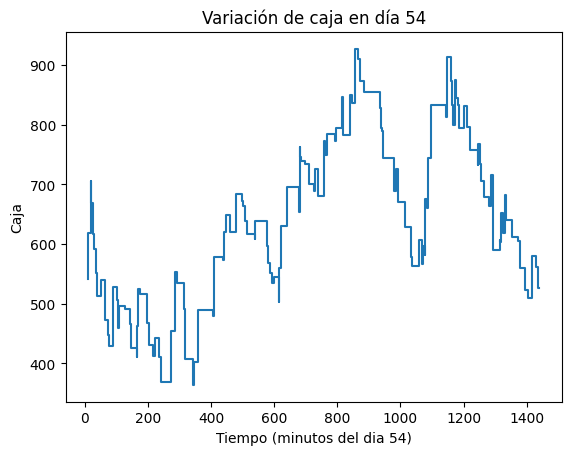

In [22]:
# b. Graficamos para un día particular, indexado desde 0
# https://stackoverflow.com/a/58079385
DIA = 54
txs_dia = txs[txs[:,COL_DIA_TX] == DIA, :]

plt.step(txs_dia[:,COL_FIN_TX] % MINUTOS_DIA, txs_dia[:,COL_CAJA])
plt.xlabel('Tiempo (minutos del dia %d)' % DIA)
plt.ylabel('Caja')
plt.title('Variación de caja en día %d' % DIA)
plt.show()

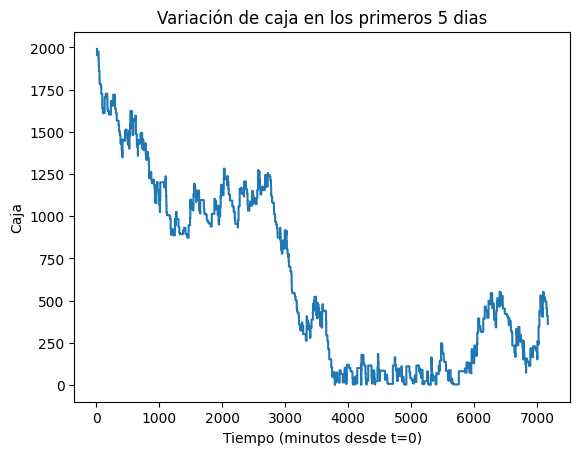

In [23]:
# también es de interés ver el comportamiento en los primeros dias
# graficamos para los primeros 5 (0 a 4)
DIA_MAX = 5
txs_dia = txs[txs[:,COL_DIA_TX] < DIA_MAX, :]

plt.step(txs_dia[:,COL_FIN_TX], txs_dia[:,COL_CAJA])
plt.xlabel('Tiempo (minutos desde t=0)')
plt.ylabel('Caja')
plt.title('Variación de caja en los primeros %d dias' % DIA_MAX)
plt.show()

In [24]:
# c. tpo medio en el sistema
avg = np.average(np.array(tpos_en_sist))
avg_str = str(round(avg, 2))
print('El tiempo promedio en el sistema (espera + uso de cajero) es de %s minutos' % avg_str)

El tiempo promedio en el sistema (espera + uso de cajero) es de 3.36 minutos


In [25]:
# d. recomendación a la entidad
UMBRAL_TASA_ABANDONOS = 0.2
tasa_abandonos = tot_abandonos / tot_arrivos
tasa_abandonos_str = str(round(tasa_abandonos * 100, 2))

if tasa_abandonos < UMBRAL_TASA_ABANDONOS:
    print('La simulación resulta en una tasa de abandonos del %s%%. En consecuencia se sugiere la implementación del cambio' % tasa_abandonos_str)
else:
    print('La simulación resulta en una tasa de abandonos del %s%%. En consecuencia no se recomienda la implementación del cambio' % tasa_abandonos_str)

La simulación resulta en una tasa de abandonos del 14.75%. En consecuencia se sugiere la implementación del cambio


Nota: en casi todas las simulaciones realizadas se obtuvo resultados entre 13% y 15% de tasa de abandono, que es una mejora respecto al 20% inicial.